# <font color=red>  Cars4U Project</font>

In [1]:
%load_ext nb_black

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings

# ignore warnings after running cell
warnings.filterwarnings("ignore")

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build linear model for prediction
from sklearn.linear_model import LinearRegression

# To check model performance
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
)

<IPython.core.display.Javascript object>

## <font color=Orange>Problem Definition & Questions To Be Answered</font>

 - Build a linear regression model to predict the best price of used cars.
 - We will clean the data and apply log transformation which improves the model using transformed versions of the features.
 - We will determine which features cause the price of used cars to increase and decrease.

 
 
 

## <font color=green>**STRUCTURE OF THE DATA**</font>

In [1]:
# import dataset "used_cars_data.csv"
data = pd.read_csv("used_cars_data.csv")

NameError: name 'pd' is not defined

In [3]:
# creating a copy of the data, df1, so that original data remains unchanged

df1 = data.copy()

<IPython.core.display.Javascript object>

In [4]:
# displays the first 5 rows in dataframe df1

df1.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


<IPython.core.display.Javascript object>

 - There are 14 columns in the dataframe, df1.
 - It can be assumed that there is a minimum of 3 different datatypes in df1:  int64, float64, object.

In [5]:
# displays the last 5 rows in dataframe df1

df1.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


<IPython.core.display.Javascript object>

In [6]:
# To get the same random results (4) every time in df1
# 10 rows in random sample 4

np.random.seed(4)
df1.sample(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
1723,1723,BMW 3 Series 320d Sport Line,Mumbai,2015,69123,Diesel,Automatic,First,18.88 kmpl,1995 CC,184 bhp,5.0,NaN,19.00
6853,6853,Volkswagen Polo 1.2 MPI Highline,Ahmedabad,2015,62000,Petrol,Manual,First,16.47 kmpl,1198 CC,74 bhp,5.0,NaN,NaN
775,775,Toyota Fortuner 4x4 MT,Bangalore,2013,74000,Diesel,Manual,Second,12.55 kmpl,2982 CC,168.5 bhp,7.0,NaN,17.90
4130,4130,Hyundai Creta 1.6 SX Plus Dual Tone Petrol,Coimbatore,2017,15731,Petrol,Manual,First,15.29 kmpl,1591 CC,121.3 bhp,5.0,NaN,12.49
7145,7145,Toyota Etios Liva G,Kolkata,2012,37212,Petrol,Manual,First,18.3 kmpl,1197 CC,null bhp,5.0,NaN,NaN
1604,1604,Chevrolet Captiva LTZ VCDi,Pune,2009,89000,Diesel,Automatic,First,12.5 kmpl,1991 CC,147.9 bhp,7.0,NaN,4.00
1850,1850,Hyundai i10 Era 1.1,Chennai,2008,85445,Petrol,Manual,Second,19.81 kmpl,1086 CC,68.05 bhp,5.0,NaN,2.00
165,165,Toyota Fortuner 4x2 Manual,Mumbai,2012,131765,Diesel,Manual,First,13.0 kmpl,2982 CC,168.5 bhp,7.0,NaN,13.50
5010,5010,Volkswagen Ameo 1.2 MPI Highline 16 Alloy,Mumbai,2016,16650,Petrol,Manual,First,17.0 kmpl,1198 CC,74 bhp,5.0,NaN,5.50


<IPython.core.display.Javascript object>

In [7]:
# determining how many rows and columns in df1

df1.shape

(7253, 14)

<IPython.core.display.Javascript object>

 - There are 7253 rows and 14 columns in df1

In [8]:
# determining if any duplicate data found in df1

df1.duplicated().sum()

0

<IPython.core.display.Javascript object>

 - There is no duplicated data found in df1.

In [9]:
# printing the columns found in df1

print(df1.columns)

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


<IPython.core.display.Javascript object>

In [10]:
# determining the data types of each individual column

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

 - Confirmed the df1 has 3 datatypes:  int64, object, float64.
 - There are null values found in some of the columns that must be treated.

In [11]:
# Transposed summary of df1

df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

 - We may have outliers in the Kilometers_Driven and Price columns.
 - New_Price has many missing values.
 - Kilometers_Driven and Price are right skewed.
 - We will need to do data pre-processing on some of the values to remove characters and convert to float.

## <font color=green>**DATA PRE-PROCESSING**</font>

### <font color=blue>**Missing Value Treatment**</font>

In [12]:
# determining the missing values found in each individual column

df1.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

 - The following columns have missing values:  Mileage - 2, Engine - 46, Power - 46, Seats - 53, New_Price - 6247, Price - 1234.
 - New_Price has a high amount of missing values.

In [13]:
# dropping S.No. as pd indexing is appropriate

df1.drop(["S.No."], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [14]:
# determining columns, data types, non-null count

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


<IPython.core.display.Javascript object>

In [15]:
# determining missing values in decending order

df1.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

<IPython.core.display.Javascript object>

In [16]:
# dropping the missing values in dependant variable "Price"

df1.dropna(subset=["Price"], inplace=True)

<IPython.core.display.Javascript object>

In [17]:
# determining missing values in decending order

df1.isnull().sum().sort_values(ascending=False)

New_Price            5195
Seats                  42
Engine                 36
Power                  36
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Price                   0
dtype: int64

<IPython.core.display.Javascript object>

In [18]:
# To get the same random (2) results every time

np.random.seed(2)
df1.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4930,Hyundai Grand i10 CRDi Sportz,Coimbatore,2017,60993,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,5.0,NaN,5.21
463,Ford Ecosport 1.5 DV5 MT Titanium,Delhi,2014,31465,Diesel,Manual,First,22.7 kmpl,1498 CC,89.84 bhp,5.0,NaN,6.50
338,Tata Manza ELAN Quadrajet BS IV,Pune,2012,73000,Diesel,Manual,First,21.12 kmpl,1248 CC,88.8 bhp,5.0,NaN,3.40
3090,Hyundai Verna CRDi,Bangalore,2010,72010,Diesel,Manual,First,16.8 kmpl,1493 CC,110 bhp,5.0,NaN,4.45
1826,Toyota Corolla Altis 1.8 GL,Kochi,2012,83184,Petrol,Manual,First,14.28 kmpl,1798 CC,138.03 bhp,5.0,21.69 Lakh,6.22
5520,Maruti Swift Dzire VDi,Jaipur,2012,72000,Diesel,Manual,First,19.3 kmpl,1248 CC,73.9 bhp,5.0,NaN,4.25
828,Hyundai i20 Asta Option 1.2,Kochi,2017,58620,Petrol,Manual,First,18.6 kmpl,1197 CC,81.83 bhp,5.0,NaN,7.14
1894,Hyundai EON D Lite Plus,Kolkata,2014,26008,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,NaN,1.97
4692,Honda City i-VTEC S,Mumbai,2015,10400,Petrol,Manual,First,17.4 kmpl,1497 CC,117.3 bhp,5.0,NaN,6.51
3604,Audi A4 New 2.0 TDI Multitronic,Jaipur,2012,60000,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,16.00


<IPython.core.display.Javascript object>

In [19]:
# determining the median values of numerical columns

df1.median()

Year                  2014.00
Kilometers_Driven    53000.00
Seats                    5.00
Price                    5.64
dtype: float64

<IPython.core.display.Javascript object>

 - The median values of Year, Kilometers_Driven, Seats, Price respectively:  2014, 53000.00, 5.00, 5.64.

### <font color=blue>**Data Manipulations**</font>

In [20]:
# this loop prints the names of the columns where there is
# at least one entry ending with the characters 'lakh'

money_cols = []
for colname in df1.columns[
    df1.dtypes == "object"
]:  # only need to consider string columns
    if (
        df1[colname].str.endswith("Lakh").any()
    ):  # using `.str` so I can use an element-wise string method
        money_cols.append(colname)
print(money_cols)

['New_Price']


<IPython.core.display.Javascript object>

 - "New_Price" has values that ends with 'Lakh'.
 - We will need to remove the characters 'Lakh' and covert str to float.

In [21]:
# this loop prints the names of the columns where there is
# at least one entry ending with the characters 'Cr'

money_cols = []
for colname in df1.columns[
    df1.dtypes == "object"
]:  # only need to consider string columns
    if (
        df1[colname].str.endswith("Cr").any()
    ):  # using `.str` so I can use an element-wise string method
        money_cols.append(colname)
print(money_cols)

['New_Price']


<IPython.core.display.Javascript object>

 - "New_Price" has values that ends with 'Cr'.
 - We will need to remove the characters 'Cr' and covert str to float.

In [22]:
# this loop is determining which columns ends with 'Lakh'and 'Cr', removing those characters
# converting 'lakh' and 'Cr' to consistent unit using multipliers of 100,000 and 10,000,000 respectively.
# and coverting str to float


def income_to_num(income_val):
    if isinstance(income_val, str):
        if income_val.endswith("Lakh"):
            multiplier = 100000  # multiply any column ending with 'Lakh' by 100000
        elif income_val.endswith("Cr"):
            multiplier = 10000000  # multiply any column ending with 'Cr' by 10000000
        return float(income_val.replace("Lakh", "").replace("Cr", "")) * multiplier
    else:
        return np.nan


for colname in money_cols:
    df1[colname] = df1[colname].apply(income_to_num)

df1[money_cols].head()

,New_Price
0,NaN
1,NaN
2,861000.0
3,NaN
4,NaN


<IPython.core.display.Javascript object>

 - Created consistent unit using multipliers 100,000 x 'Lakh' and 10,000,000 x 'Cr'.
 - Removed 'Lakh' and 'Cr' from individual values and converted from str to float. 
 

In [23]:
# this loop prints the names of the columns where there is
# at least one entry ending with the characters 'kmpl'

mileage_cols = []
for colname in df1.columns[
    df1.dtypes == "object"
]:  # only need to consider string columns
    if (
        df1[colname].str.endswith("kmpl").any()
    ):  # using `.str` so I can use an element-wise string method
        mileage_cols.append(colname)
print(mileage_cols)

['Mileage']


<IPython.core.display.Javascript object>

In [24]:
# this loop is determining which columns ends with 'kmpl'and 'km/kg', removing those characters
# and coverting str to float


def mileage_to_num(mileage_val):
    if isinstance(mileage_val, str):

        return float(mileage_val.replace("kmpl", "").replace("km/kg", ""))
    else:
        return np.nan


for colname in mileage_cols:
    df1[colname] = df1[colname].apply(mileage_to_num)

df1[mileage_cols].head()

,Mileage
0,26.60
1,19.67
2,18.20
3,20.77
4,15.20


<IPython.core.display.Javascript object>

 - Removed 'kmpl' and 'km/kg' from individual values and converted from str to float. 

In [25]:
# this loop prints the names of the columns where there is
# at least one entry ending with the characters 'CC'

engine_cols = []
for colname in df1.columns[
    df1.dtypes == "object"
]:  # only need to consider string columns
    if (
        df1[colname].str.endswith("CC").any()
    ):  # using `.str` so I can use an element-wise string method
        engine_cols.append(colname)
print(engine_cols)

['Engine']


<IPython.core.display.Javascript object>

In [26]:
# this loop is determining which columns ends with 'CC', removing those characters
# and coverting str to float


def engine_to_num(engine_val):
    if isinstance(engine_val, str):

        return float(engine_val.replace("CC", ""))
    else:
        return np.nan


for colname in engine_cols:
    df1[colname] = df1[colname].apply(engine_to_num)

df1[engine_cols].head()

,Engine
0,998.0
1,1582.0
2,1199.0
3,1248.0
4,1968.0


<IPython.core.display.Javascript object>

 - Removed 'CC' from individual values and converted from str to float.

In [27]:
# this loop prints the names of the columns where there is
# at least one entry ending with the characters 'bhp'

power_cols = []
for colname in df1.columns[
    df1.dtypes == "object"
]:  # only need to consider string columns
    if (
        df1[colname].str.endswith("bhp").any()
    ):  # using `.str` so I can use an element-wise string method
        power_cols.append(colname)
print(power_cols)

['Power']


<IPython.core.display.Javascript object>

In [28]:
# this loop is determining which columns starts with 'null'

power_cols_null = []
for colname in df1.columns[
    df1.dtypes == "object"
]:  # only need to consider string columns
    if (
        df1[colname].str.startswith("null").any()
    ):  # using `.str` so I can use an element-wise string method
        power_cols_null.append(colname)
print(power_cols_null)

['Power']


<IPython.core.display.Javascript object>

In [29]:
# this loop is replacing any column the starts with "null bhp" and replacing it with "NaN"
# this loop is removing 'bhp' from any column
# coverting str to float


def power_to_num(power_val):
    if isinstance(power_val, str):

        return float(power_val.replace("null bhp", "NaN").replace("bhp", ""))
    else:
        return np.nan


for colname in power_cols:
    df1[colname] = df1[colname].apply(power_to_num)

df1[power_cols].head()

,Power
0,58.16
1,126.20
2,88.70
3,88.76
4,140.80


<IPython.core.display.Javascript object>

 - Replacing 'null bhp' with 'NaN' and removing "bhp" from value counts.
 - Convert "Power" from str to float.

In [30]:
# determine columns for datatypes and non-null values

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 658.3+ KB


<IPython.core.display.Javascript object>

### <font color=blue>**Mean Imputation**</font>

 - Mileage, Engine, Power, and New_Price have been converted to 'float64' from 'object'.

In [31]:
# determine missing values in columns

df1.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

<IPython.core.display.Javascript object>

In [32]:
# determine amount of missing values per columns

df1.isnull().sum(axis=1).value_counts()

1    5050
0     823
2     106
4      36
3       4
dtype: int64

<IPython.core.display.Javascript object>

 - There are 823 columns that have 0 missing values, 5050 columns that have 1 missing value, 106 columns that have 2 missing values, 4 columns that have 3 missing values, and 36 columns that have 4 missing values.

In [33]:
# dropping "New_Price" column

df1.drop(["New_Price"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

 - Dropping "New_Price" because it has too many missing values to impute properly.

In [34]:
# determine amount of missing values per columns

df1.isnull().sum(axis=1).value_counts()

0    5872
1     107
3      36
2       4
dtype: int64

<IPython.core.display.Javascript object>

 - The missing value count has decreased drastically after dropping "New_Price".
 - There are 5872 columns with 0 missing values, 107 columns with 1 missing value, 4 columns with 2 missing values, and 36 columns with 3 missing values.
 

In [35]:
# determine missing values by column

df1.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

 - The following columns still have missing values:  Mileage - 2, Engine - 36, Power - 143, Seats - 42.

In [36]:
# filling the missing values in "Seats" column with mean value of "Seats" column

print(df1["Seats"].isnull().sum())
df1["Seats"].fillna(df1["Seats"].mean(), inplace=True)  # mean imputation
df1["Seats"].isnull().sum()

42


0

<IPython.core.display.Javascript object>

 - Using mean imputation to fill missing values of 'Seats' column with the average of 'Seats' in non missing value rows.
 - There are now no missing values in the 'Seats' column.

In [37]:
# filling the missing values in "Engine" column with mean value of "Engine" column

print(df1["Engine"].isnull().sum())
df1["Engine"].fillna(df1["Engine"].mean(), inplace=True)  # mean imputation
df1["Engine"].isnull().sum()

36


0

<IPython.core.display.Javascript object>

 - Using mean imputation to fill missing values of 'Engine' column with the average of 'Engine' in non missing value rows.
 - There are now no missing values in the 'Engine' column.

In [38]:
# filling the missing values in "Power" column with mean value of "Power" column

print(df1["Power"].isnull().sum())
df1["Power"].fillna(df1["Power"].mean(), inplace=True)  # mean imputation
df1["Power"].isnull().sum()

143


0

<IPython.core.display.Javascript object>

 - Using mean imputation to fill missing values of 'Power' column with the average of 'Power' in non missing value rows.
 - There are now no missing values in the 'Power' column.

In [39]:
# filling the missing values in "Mileage" column with mean value of "Mileage" column

print(df1["Mileage"].isnull().sum())
df1["Mileage"].fillna(df1["Mileage"].mean(), inplace=True)  # mean imputation
df1["Mileage"].isnull().sum()

2


0

<IPython.core.display.Javascript object>

 - Using mean imputation to fill missing values of 'Mileage' column with the average of 'Mileage' in non missing value rows.
 - There are now no missing values in the 'Mileage' column.

In [40]:
# determining missing values

df1.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<IPython.core.display.Javascript object>

- There are no missing values remaining in df1

In [41]:
# summary of the data

df1.describe()  # summary of the data

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,6019.000000,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,9.479468
std,3.269742,9.126884e+04,4.581528,599.553865,53.231019,0.806012,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,98.600000,5.000000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000


<IPython.core.display.Javascript object>

 - There may be additional outliers in the Mileage, Engine, and Power columns.
 - We will check for outliers later in the project.

### <font color=blue>**Univariate Analysis**</font>

In [42]:
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable


def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

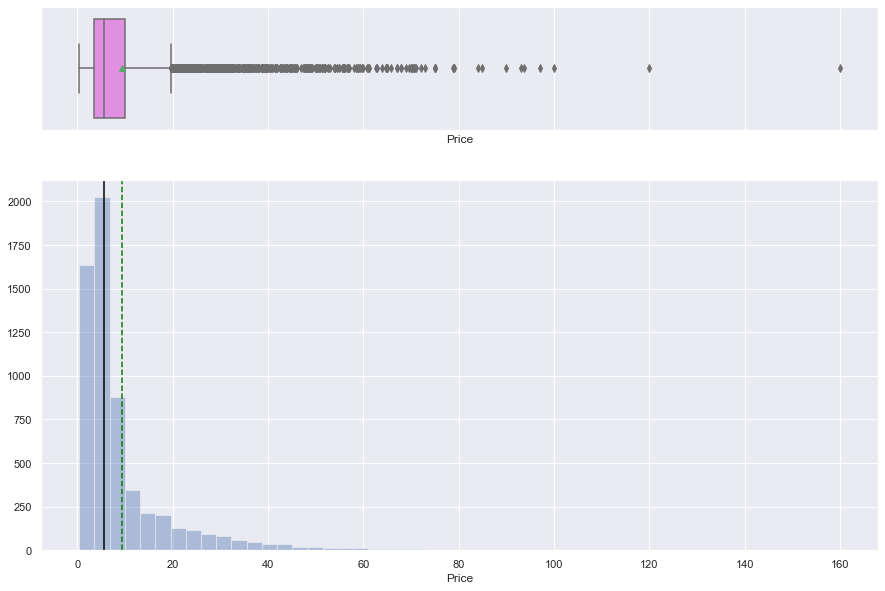

<IPython.core.display.Javascript object>

In [43]:
# creating histogram and box plot of df1 numerical column "Price"

histogram_boxplot(df1["Price"])

 - Visual interpretation shows possible outliers.
 - Price is right skewed.

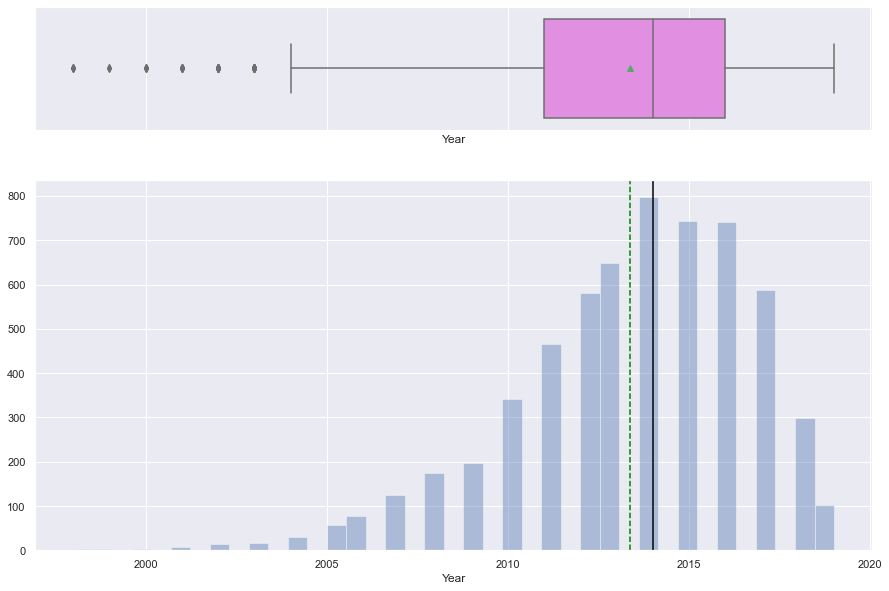

<IPython.core.display.Javascript object>

In [44]:
# creating histogram and boxplot of df1 numerical column "Year"

histogram_boxplot(df1["Year"])

 - The graph is slightly left screwed but that may be caused by outliers.

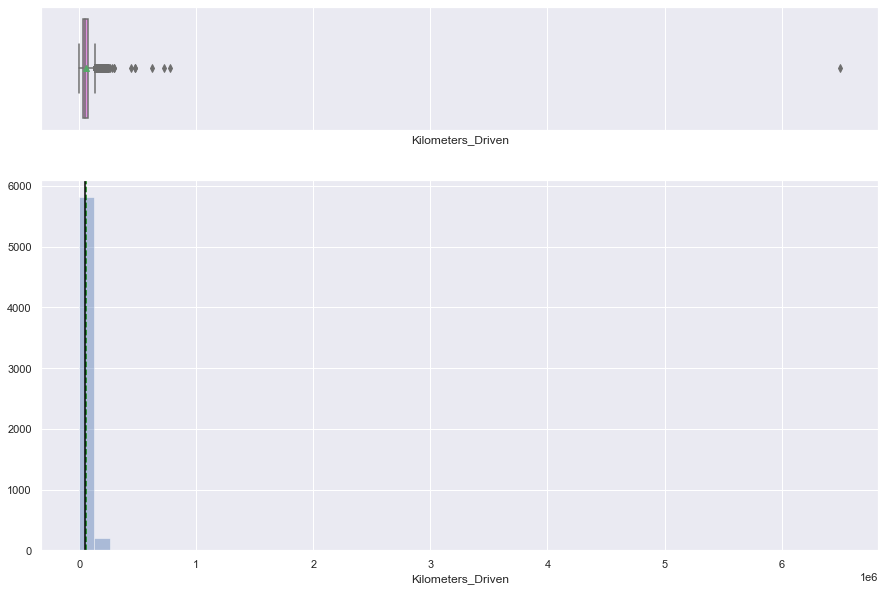

<IPython.core.display.Javascript object>

In [45]:
# creating histogram and boxplot of df1 numerical column "Kilometers_Driven"

histogram_boxplot(df1["Kilometers_Driven"])

 - Highly right skewed most likely due to aggressive outliers.

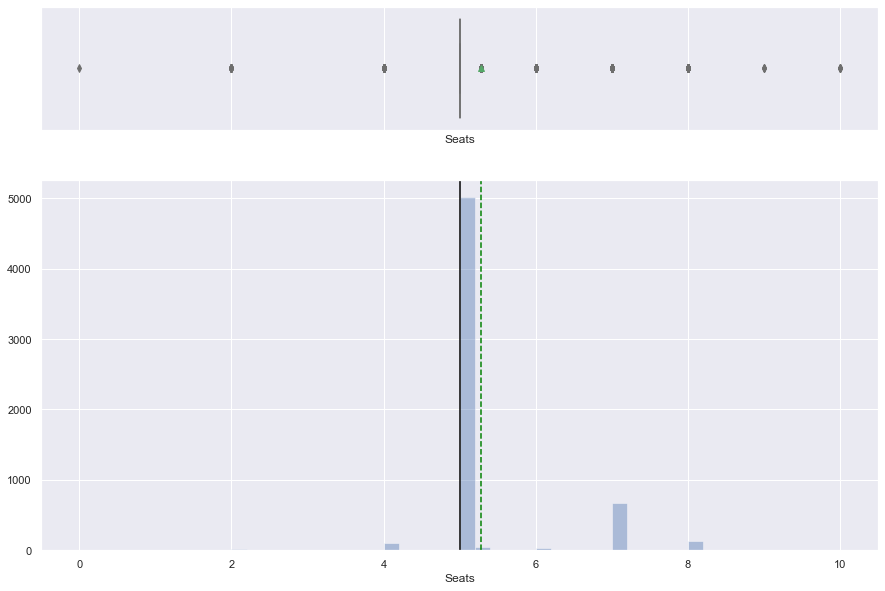

<IPython.core.display.Javascript object>

In [46]:
# creating histogram and boxplot of df1 numerical column "Seats"

histogram_boxplot(df1["Seats"])

 - Mostly evenly distributed.
 - Doesn't seem to have enough value counts for outliers.

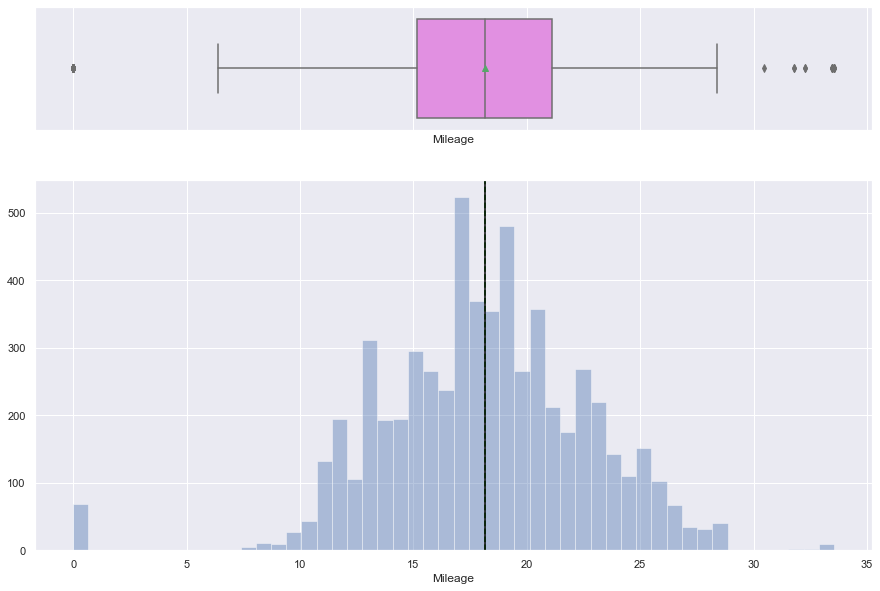

<IPython.core.display.Javascript object>

In [47]:
# creating histogram and boxplot of df1 numerical column "Mileage"

histogram_boxplot(df1["Mileage"])

 - Evenly distributed.

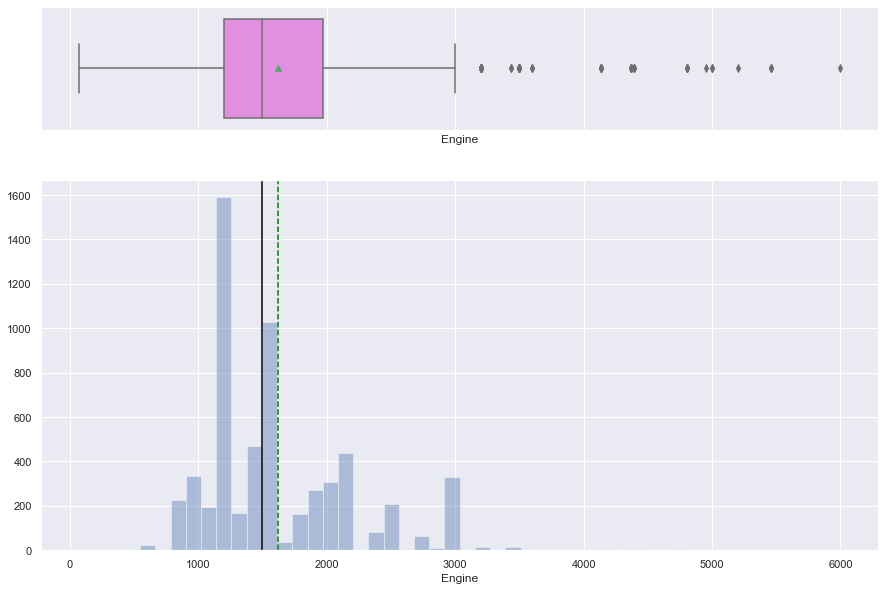

<IPython.core.display.Javascript object>

In [48]:
# creating histogram and boxplot of df1 numerical column "Engine"

histogram_boxplot(df1["Engine"])

 - Possible outliers found within the boxplot.
 - Histogram is right skewed.

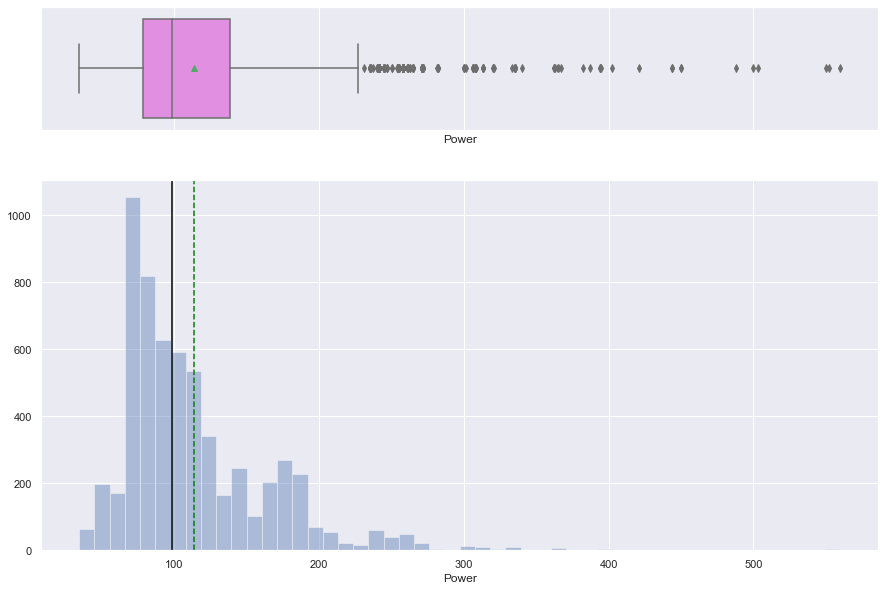

<IPython.core.display.Javascript object>

In [49]:
# creating histogram and boxplot of df1 numerical column "Power"

histogram_boxplot(df1["Power"])

 - Possibly many outliers from visualizing the boxplot.
 - Histogram is right skewed.

In [50]:
# Function to create barplots that indicate percentage for each category.


def perc_on_bar(data, z):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """

    total = len(data[z])  # length of the column
    plt.figure(figsize=(15, 5))
    plt.xticks(rotation=45)
    ax = sns.countplot(data[z], palette="Paired")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot

        ax.annotate(percentage, (x, y), size=10)  # annotate the percantage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

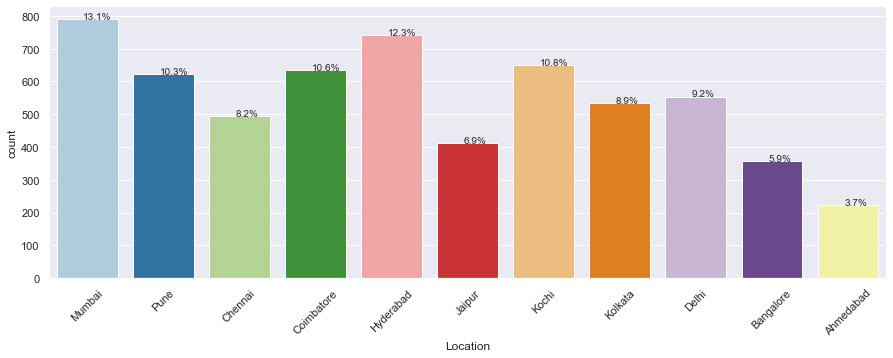

<IPython.core.display.Javascript object>

In [51]:
# creating barplot of df1 catergory "Location"

perc_on_bar(df1, "Location")

 - Mumbai has the most cars sold followed by Hyderabad and Kochi.
 - Ahmedabad has the least amount of cars sold.

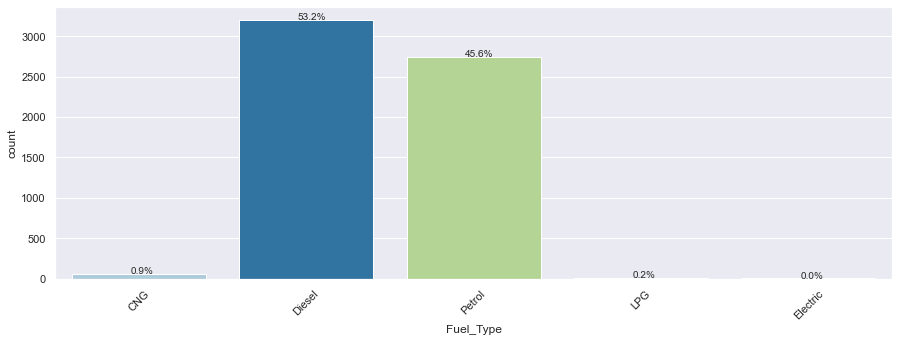

<IPython.core.display.Javascript object>

In [52]:
# creating barplot of df1 catergory "Fuel_Type"

perc_on_bar(df1, "Fuel_Type")

 - Diesel and Petrol are the most common Fuel Type by a vast majority.
 - CNG, LPG, and Electric are uncommon Fuel Types.

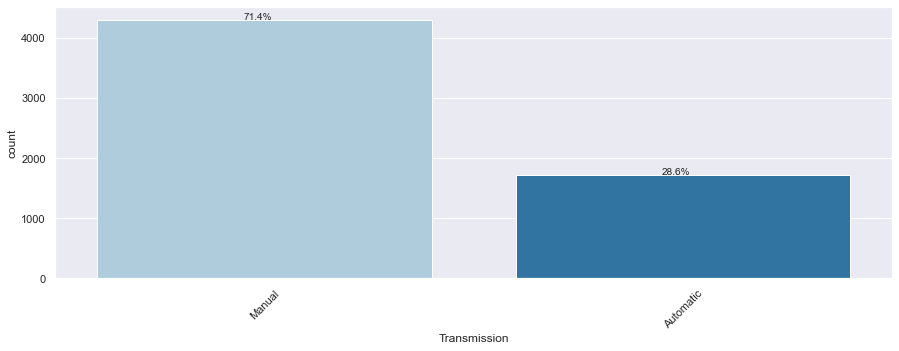

<IPython.core.display.Javascript object>

In [53]:
# creating barplot of df1 catergory "Transmission"

perc_on_bar(df1, "Transmission")

 - Manual transmissions are much more common than Automatic tranmissions.
 - Just over 71% of the cars use Manual Transmissions.

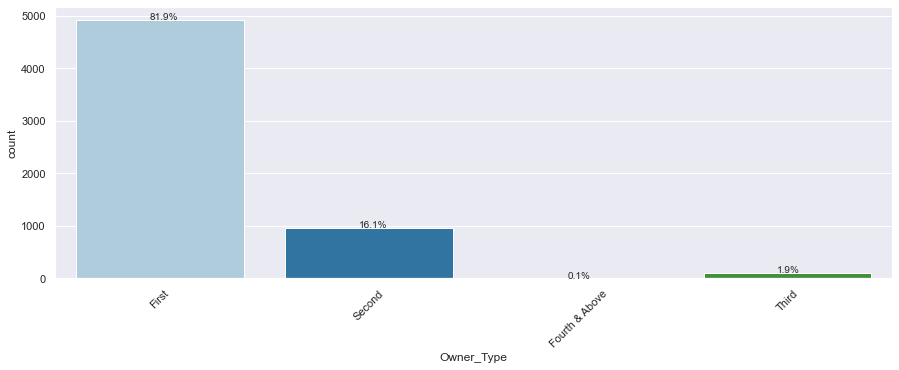

<IPython.core.display.Javascript object>

In [54]:
# creating barplot of df1 catergory "Owner_Type"

perc_on_bar(df1, "Owner_Type")

 - This is the first car for the majority of owners.
 - Very few, 0.1%, have owned 4 or more cars.

### <font color=blue>**Bivariate Analysis**</font>

In [55]:
# correlation between numerical columns

correlation = df1.corr()
correlation

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
Year,1.000000,-0.173048,0.321534,-0.051712,0.013895,0.012204,0.305327
Kilometers_Driven,-0.173048,1.000000,-0.065253,0.091029,0.033419,0.083072,-0.011493
Mileage,0.321534,-0.065253,1.000000,-0.588354,-0.506801,-0.303086,-0.306588
Engine,-0.051712,0.091029,-0.588354,1.000000,0.859020,0.393087,0.657118
Power,0.013895,0.033419,-0.506801,0.859020,1.000000,0.100200,0.767331
Seats,0.012204,0.083072,-0.303086,0.393087,0.100200,1.000000,0.052118
Price,0.305327,-0.011493,-0.306588,0.657118,0.767331,0.052118,1.000000


<IPython.core.display.Javascript object>

 - There is a high correlation between "Engine" and "Power".  As one value increases, so will the other.
 - There is a high correlation between "Price" and "Power".  As one value increases, so will the other.
 - There is a somewhat high correlation between "Engine" and "Price".  As one value increases, so will the other.
 - There is a negative correlation between "Mileage" and "Engine".  
 - There is a negative correlation between "Mileage" and "Engine".

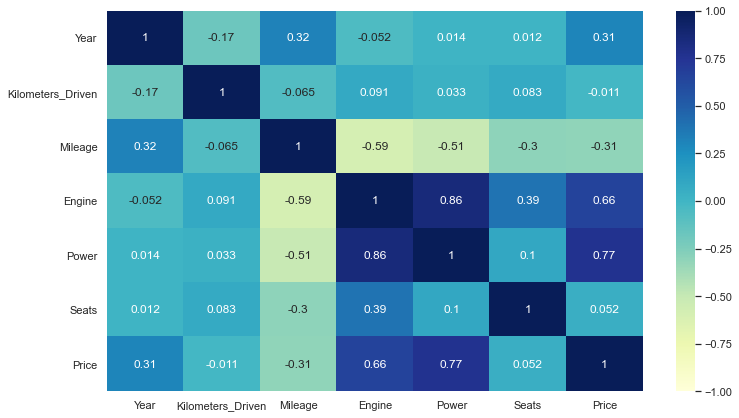

<IPython.core.display.Javascript object>

In [56]:
# heatmap that shows correlation between numerical columns

plt.figure(figsize=(12, 7))
sns.heatmap(correlation, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)
plt.show()

<AxesSubplot:xlabel='Location', ylabel='Price'>

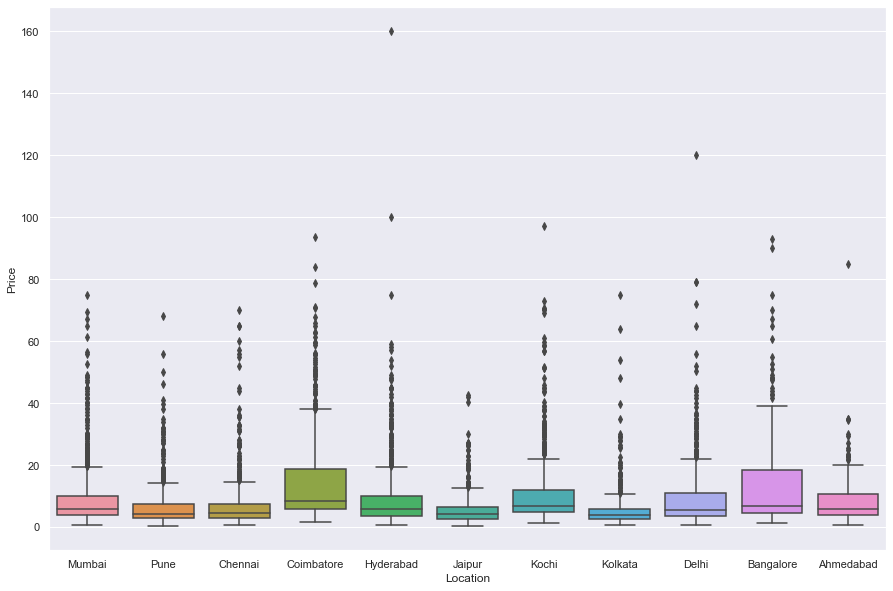

<IPython.core.display.Javascript object>

In [57]:
# creating boxplot: x axis = Location, y axis = Price

plt.figure(figsize=(15, 10))
sns.boxplot(x="Location", y="Price", data=df1)

 - The price of cars is pretty evenly distributed with respect to location.
 - Outliers detected within location column.

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

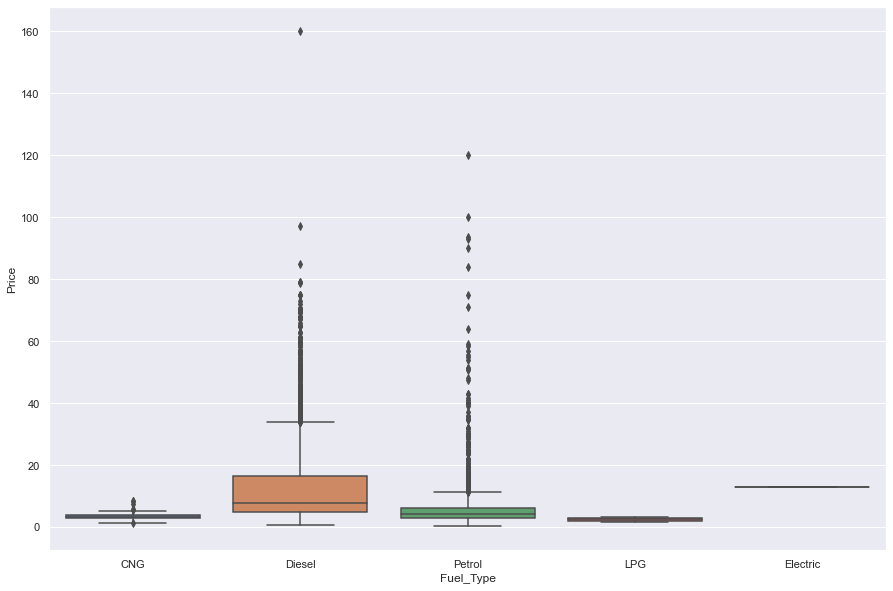

<IPython.core.display.Javascript object>

In [58]:
# creating boxplot: x axis = Fuel_Type, y axis = Price

plt.figure(figsize=(15, 10))
sns.boxplot(x="Fuel_Type", y="Price", data=df1)

 - Outliers visualized.
 - Diesel cars seem to have the highest price.

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

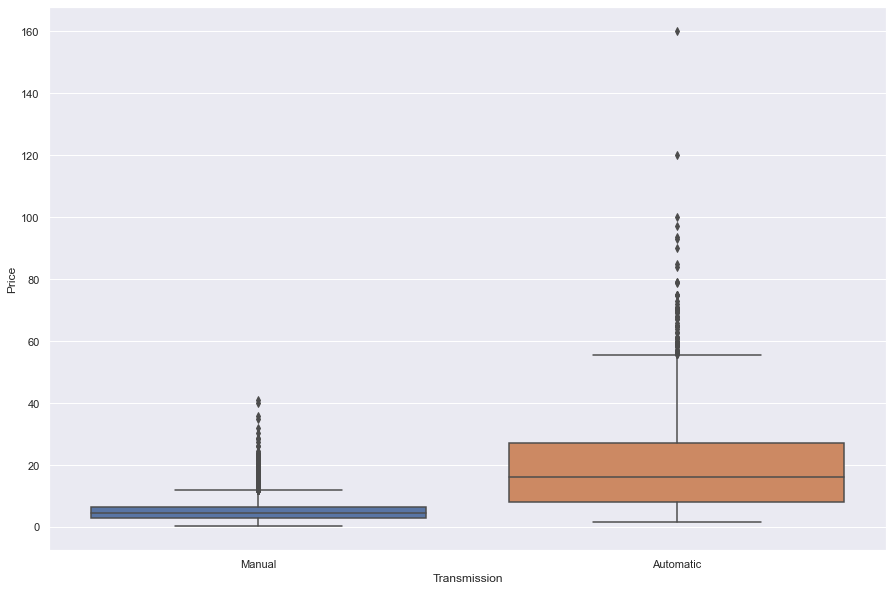

<IPython.core.display.Javascript object>

In [59]:
# creating boxplot: x axis = Transmission, y axis = Price

plt.figure(figsize=(15, 10))
sns.boxplot(x="Transmission", y="Price", data=df1)

 - Automatic transmissions are higher priced than manual transmissions.
 - Outliers found within the data.

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

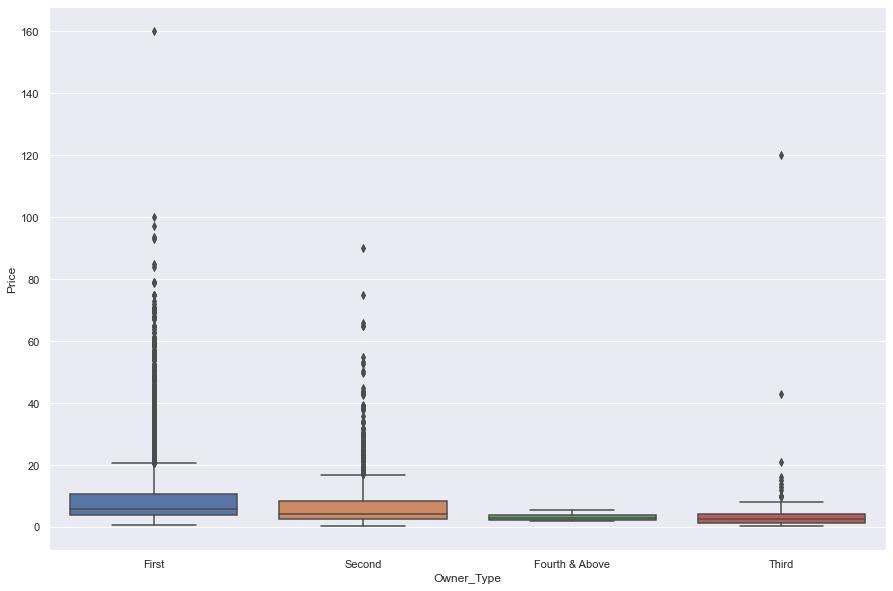

<IPython.core.display.Javascript object>

In [60]:
# creating boxplot: x axis = Owner_type, y axis = Price

plt.figure(figsize=(15, 10))
sns.boxplot(x="Owner_Type", y="Price", data=df1)

 - First time owners tend to spend more on car followed by second, third and fourth & above.
 - There seems to be outliers present in the data.

### <font color=blue>**Log Transformation**</font>

In [61]:
# creating a copy of the dataframe, df_log, in preperation log transformation

df_log = df1.copy()

<IPython.core.display.Javascript object>

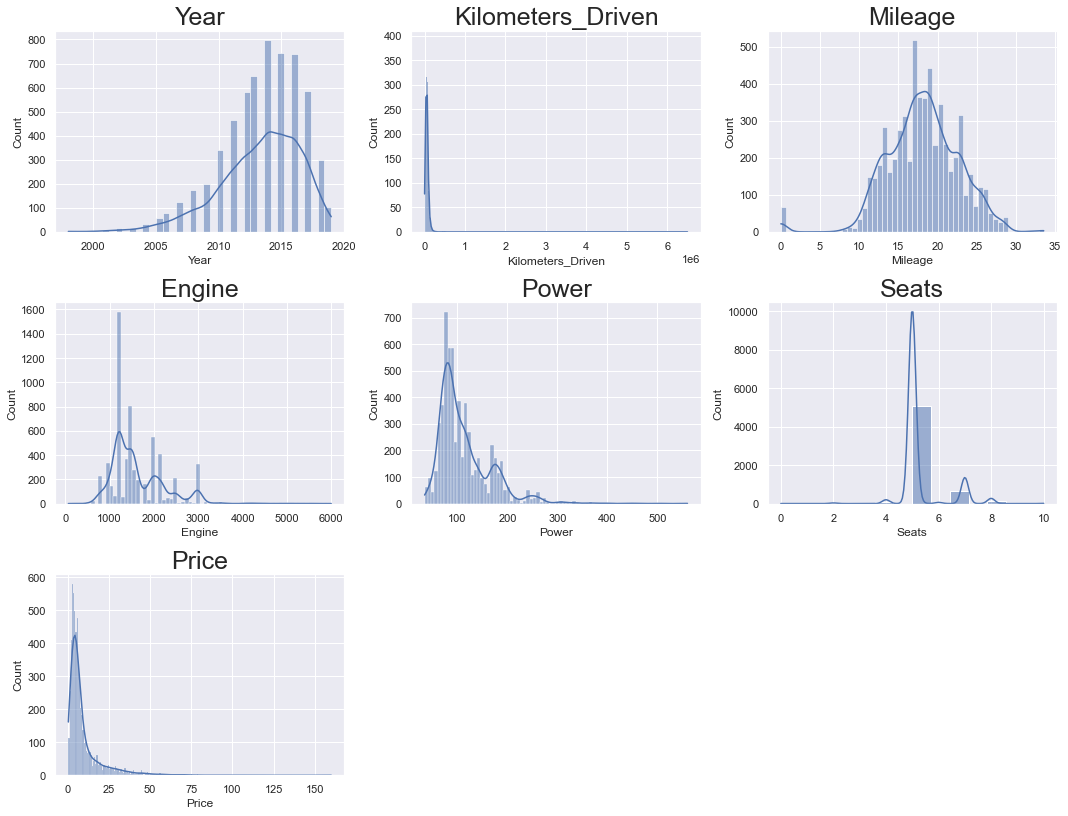

<IPython.core.display.Javascript object>

In [62]:
# creating a list of categorical values

dist_cols = [
    item
    for item in df_log.select_dtypes(include=np.number).columns
    if "Fuel_Type, Location, Owner_Type, Transmission" not in item
]


# plot a histogram of all numerical columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)

    sns.histplot(data=df_log, x=dist_cols[i], kde=True)  # creating distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

 - Year is left skewed.
 - Kilometers_Driven, Engine, Power, Price are all right skewed.
 - Milage has even distribution.
 - Seats has minimum value counts.

In [63]:
# removing 'Seats' columns as it mainly has a couple values

dist_cols.remove("Seats")

# also dropping the 'Mileage' column as it is almost normally distributed

dist_cols.remove("Mileage")

# also dropping dependant variable, "Price"

dist_cols.remove("Price")

<IPython.core.display.Javascript object>

In [64]:
# using log transforms on some columns

for col in dist_cols:
    df_log[col + "_log"] = np.log(df_log[col] + 1)


# dropping the original columns

df_log.drop(dist_cols, axis=1, inplace=True)
df_log.head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Price,Year_log,Kilometers_Driven_log,Engine_log,Power_log
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,26.60,5.0,1.75,7.606387,11.184435,6.906755,4.080246
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,19.67,5.0,12.50,7.608871,10.621352,7.367077,4.845761
2,Honda Jazz V,Chennai,Petrol,Manual,First,18.20,5.0,4.50,7.606885,10.736418,7.090077,4.496471
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,20.77,7.0,6.00,7.607381,11.373675,7.130099,4.497139
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,15.20,5.0,17.74,7.607878,10.613271,7.585281,4.954418


<IPython.core.display.Javascript object>

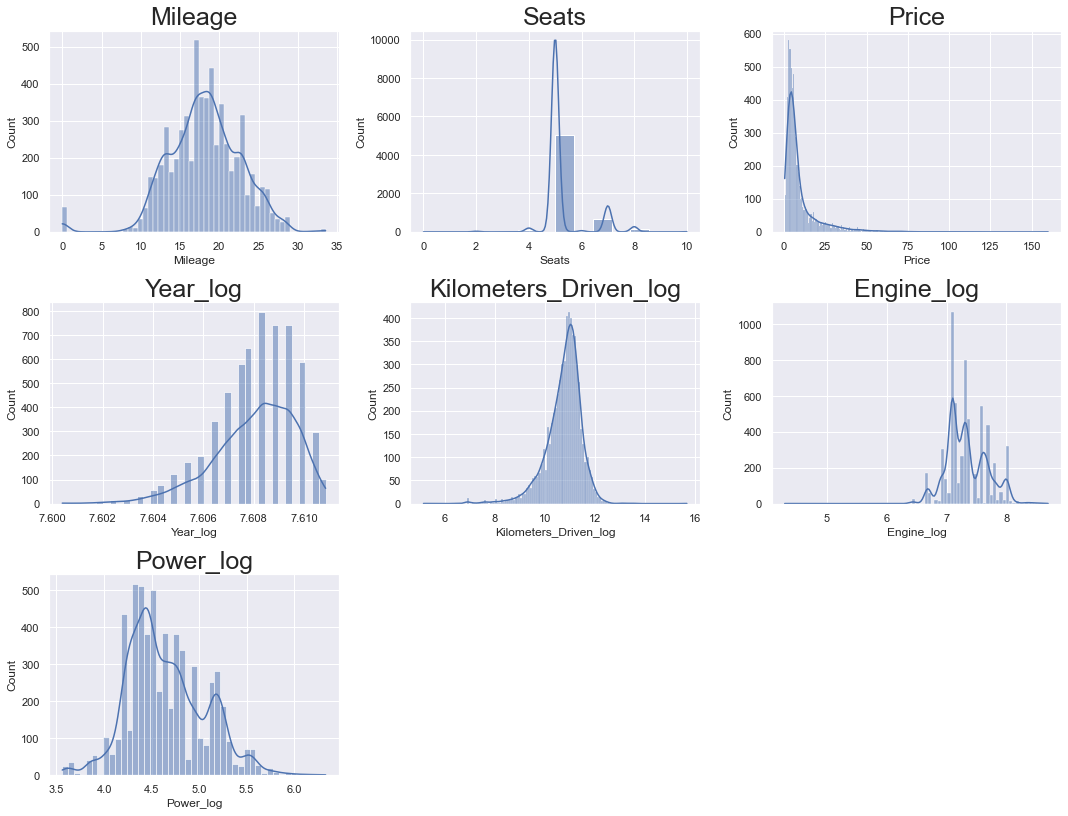

<IPython.core.display.Javascript object>

In [65]:
# creating a list of categorical values

dist_cols = [
    item
    for item in df_log.select_dtypes(include=np.number).columns
    if "Fuel_Type, Location, Owner_Type, Transmission" not in item
]


# plot histogram of all numeric columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)

    sns.histplot(data=df_log, x=dist_cols[i], kde=True)  # creating distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

 - Kilometers_Driven and Price were most affected by log transformation creating a much more even distribution.
 - Using visualiztion, there seems to be some small improvements in the Power and Engine columns.

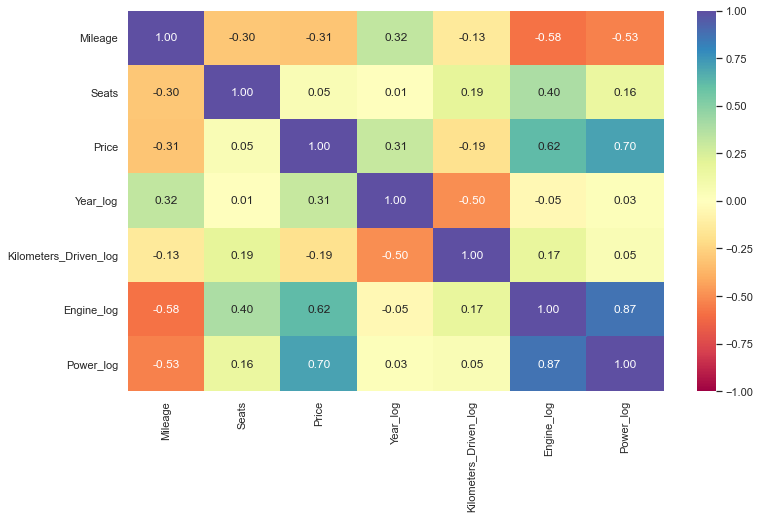

<IPython.core.display.Javascript object>

In [66]:
# creating heatmap after log transformation

plt.figure(figsize=(12, 7))
sns.heatmap(
    df_log[dist_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

 - The correlation between numerical columns changed minimally for most values.
 - Log transformation had the largest affect on the Kilometers_Driven_log.

### <font color=blue>**One Hot Encoding**</font>

In [67]:
# creating a new copy, df2, of df_log

df2 = df_log.copy()

<IPython.core.display.Javascript object>

In [68]:
# create list of columns with categorical values

cols_with_list_vals = ["Location", "Fuel_Type", "Transmission", "Owner_Type"]

<IPython.core.display.Javascript object>

In [69]:
# create dummy variables for "Fuel_Type"

pd.get_dummies(df2["Fuel_Type"], drop_first=False)

,CNG,Diesel,Electric,LPG,Petrol
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
6014,0,1,0,0,0
6015,0,1,0,0,0
6016,0,1,0,0,0
6017,0,0,0,0,1


<IPython.core.display.Javascript object>

In [70]:
# create output of value counts associated with categorical values, "Name" and "Fuel_Type"

Fuel_Type_df = df2.loc[:, ["Name", "Fuel_Type"]].copy()

val_c = Fuel_Type_df.Fuel_Type.value_counts()
val_c

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

<IPython.core.display.Javascript object>

 - In respect to Fuel_Type, there are 3205 Diesel cars, 2746 Petrol cars, 56 CNG cars, 10 LPG cars, and 2 electric cars.

In [71]:
# set value count threshold to 0

threshold = 0
val_c[val_c.values >= threshold]

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

<IPython.core.display.Javascript object>

In [72]:
# created a list with Fuel_Type names taken into consideration

Fuel_Type_list = val_c[val_c.values >= threshold].index.tolist()
print("Fuel_Type names taken into consideration:", len(Fuel_Type_list), Fuel_Type_list)

Fuel_Type names taken into consideration: 5 ['Diesel', 'Petrol', 'CNG', 'LPG', 'Electric']


<IPython.core.display.Javascript object>

In [73]:
# creating additional columns for dummy variables in Fuel_Type

Fuel_Type_df = df2.loc[:, ["Name", "Fuel_Type"]].copy()

for item in Fuel_Type_list:
    Fuel_Type_df["Fuel_Type_" + item] = 0


# creating a column to denote Fuel_Type other than the ones in the list

Fuel_Type_df["Fuel_Type_Others"] = 0
Fuel_Type_df.head()

,Name,Fuel_Type,Fuel_Type_Diesel,Fuel_Type_Petrol,Fuel_Type_CNG,Fuel_Type_LPG,Fuel_Type_Electric,Fuel_Type_Others
0,Maruti Wagon R LXI CNG,CNG,0,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Diesel,0,0,0,0,0,0
2,Honda Jazz V,Petrol,0,0,0,0,0,0
3,Maruti Ertiga VDI,Diesel,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Diesel,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [74]:
# rows and columns is Fuel_Type_df

Fuel_Type_df.shape

(6019, 8)

<IPython.core.display.Javascript object>

In [75]:
for i in range(Fuel_Type_df.shape[0]):  # iterate over all rows in data
    txt = Fuel_Type_df.Fuel_Type.values[i]  # getting the values in Fuel_Type column
    flag = 0  # flag variable
    for item in Fuel_Type_list:  # iterate over the list of Fuel_Type considered
        if item in txt:  # checking if Fuel_Type is in the row
            Fuel_Type_df.loc[i, "Fuel_Type_" + item] = 1
            flag = 1
    if (
        flag == 0
    ):  # if the row values is different from the list of Fuel_Type considered
        Fuel_Type_df.loc[i, "Fuel_Type_Others"] = 1
Fuel_Type_df.head()

,Name,Fuel_Type,Fuel_Type_Diesel,Fuel_Type_Petrol,Fuel_Type_CNG,Fuel_Type_LPG,Fuel_Type_Electric,Fuel_Type_Others
0,Maruti Wagon R LXI CNG,CNG,0,0,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Diesel,1,0,0,0,0,0
2,Honda Jazz V,Petrol,0,1,0,0,0,0
3,Maruti Ertiga VDI,Diesel,1,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Diesel,1,0,0,0,0,0


<IPython.core.display.Javascript object>

 - Our updated dataframe includes one_hot_encoding for the Fuel_Type value categories.
 - Fuel_Type value categories can now be treated as a numerical column in modeling.

In [76]:
# concatenating the Fuel_Type dataframe to the original data

df2 = pd.concat([df2, Fuel_Type_df.iloc[:, 2:]], axis=1)
df2.head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Seats,Price,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Fuel_Type_Diesel,Fuel_Type_Petrol,Fuel_Type_CNG,Fuel_Type_LPG,Fuel_Type_Electric,Fuel_Type_Others
0,Maruti Wagon R LXI CNG,Mumbai,CNG,Manual,First,26.60,5.0,1.75,7.606387,11.184435,6.906755,4.080246,0,0,1,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Diesel,Manual,First,19.67,5.0,12.50,7.608871,10.621352,7.367077,4.845761,1,0,0,0,0,0
2,Honda Jazz V,Chennai,Petrol,Manual,First,18.20,5.0,4.50,7.606885,10.736418,7.090077,4.496471,0,1,0,0,0,0
3,Maruti Ertiga VDI,Chennai,Diesel,Manual,First,20.77,7.0,6.00,7.607381,11.373675,7.130099,4.497139,1,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Diesel,Automatic,Second,15.20,5.0,17.74,7.607878,10.613271,7.585281,4.954418,1,0,0,0,0,0


<IPython.core.display.Javascript object>

In [77]:
# dropping "Fuel Type" category

df2.drop("Fuel_Type", axis=1, inplace=True)
df2.shape

(6019, 17)

<IPython.core.display.Javascript object>

In [78]:
# create dummy variables for "Transmission"

pd.get_dummies(df1["Transmission"], drop_first=True)

,Manual
0,1
1,1
2,1
3,1
4,0
...,...
6014,1
6015,1
6016,1
6017,1


<IPython.core.display.Javascript object>

In [79]:
# create output of value counts associated with categorical values, "Name" and "Transmission"

Transmission_df = df2.loc[:, ["Name", "Transmission"]].copy()
val_c = Transmission_df.Transmission.value_counts()
val_c

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

<IPython.core.display.Javascript object>

 - In respect to transmission, there are 4299 manual transmissions and 1720 automatic transmissions.

In [80]:
# set value count threshold to 0

threshold = 0
val_c[val_c.values >= threshold]

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

<IPython.core.display.Javascript object>

In [81]:
# created a list with Transmission names taken into consideration

Transmission_list = val_c[val_c.values >= threshold].index.tolist()
print(
    "Transmission names taken into consideration:",
    len(Transmission_list),
    Transmission_list,
)

Transmission names taken into consideration: 2 ['Manual', 'Automatic']


<IPython.core.display.Javascript object>

In [82]:
# creating additional columns for dummy variables in Transmission

Transmission_df = df2.loc[:, ["Name", "Transmission"]].copy()
for item in Transmission_list:
    Transmission_df["Transmission_" + item] = 0


# creating a column to denote Transmission other than the ones in the list

Transmission_df["Transmission_Others"] = 0
Transmission_df.head()

,Name,Transmission,Transmission_Manual,Transmission_Automatic,Transmission_Others
0,Maruti Wagon R LXI CNG,Manual,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Manual,0,0,0
2,Honda Jazz V,Manual,0,0,0
3,Maruti Ertiga VDI,Manual,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Automatic,0,0,0


<IPython.core.display.Javascript object>

In [83]:
# rows and columns is Transmission_df

Transmission_df.shape

(6019, 5)

<IPython.core.display.Javascript object>

In [84]:
for i in range(Transmission_df.shape[0]):  # iterate over all rows in data
    txt = Transmission_df.Transmission.values[
        i
    ]  # getting the values in tranmission column
    flag = 0  # flag variable
    for item in Transmission_list:  # iterate over the list of transmission considered
        if item in txt:  # checking if transmission is in the row
            Transmission_df.loc[i, "Transmission_" + item] = 1
            flag = 1
    if (
        flag == 0
    ):  # if the row values is different from the list of transmissions considered
        Transmission_df.loc[i, "Transmission_Others"] = 1
Transmission_df.head()

,Name,Transmission,Transmission_Manual,Transmission_Automatic,Transmission_Others
0,Maruti Wagon R LXI CNG,Manual,1,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Manual,1,0,0
2,Honda Jazz V,Manual,1,0,0
3,Maruti Ertiga VDI,Manual,1,0,0
4,Audi A4 New 2.0 TDI Multitronic,Automatic,0,1,0


<IPython.core.display.Javascript object>

 - Our updated dataframe includes one_hot_encoding for the Transmission value categories.
 - Transmission value categories can now be treated as a numerical column in modeling.

In [85]:
# concatenating the Transmission dataframe to the original data

df2 = pd.concat([df2, Transmission_df.iloc[:, 2:]], axis=1)
df2.head()

,Name,Location,Transmission,Owner_Type,Mileage,Seats,Price,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Fuel_Type_Diesel,Fuel_Type_Petrol,Fuel_Type_CNG,Fuel_Type_LPG,Fuel_Type_Electric,Fuel_Type_Others,Transmission_Manual,Transmission_Automatic,Transmission_Others
0,Maruti Wagon R LXI CNG,Mumbai,Manual,First,26.60,5.0,1.75,7.606387,11.184435,6.906755,4.080246,0,0,1,0,0,0,1,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,Manual,First,19.67,5.0,12.50,7.608871,10.621352,7.367077,4.845761,1,0,0,0,0,0,1,0,0
2,Honda Jazz V,Chennai,Manual,First,18.20,5.0,4.50,7.606885,10.736418,7.090077,4.496471,0,1,0,0,0,0,1,0,0
3,Maruti Ertiga VDI,Chennai,Manual,First,20.77,7.0,6.00,7.607381,11.373675,7.130099,4.497139,1,0,0,0,0,0,1,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Automatic,Second,15.20,5.0,17.74,7.607878,10.613271,7.585281,4.954418,1,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [86]:
# dropping "Transmission" category

df2.drop("Transmission", axis=1, inplace=True)
df2.shape

(6019, 19)

<IPython.core.display.Javascript object>

In [87]:
# create dummy variables for "Owner_Type"

pd.get_dummies(df1["Owner_Type"], drop_first=True)

,Fourth & Above,Second,Third
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
6014,0,0,0
6015,0,0,0
6016,0,1,0
6017,0,0,0


<IPython.core.display.Javascript object>

In [88]:
# create output of value counts associated with categorical values, "Name" and "Owner_Type"

Owner_Type_df = df2.loc[:, ["Name", "Owner_Type"]].copy()

val_c = Owner_Type_df.Owner_Type.value_counts()
val_c

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

<IPython.core.display.Javascript object>

In respect to Owner_Type, there are 4929 first time owners, 968 second owners, 113 third owners and 9 fourth and above.

In [89]:
# set value count threshold to 0

threshold = 0
val_c[val_c.values >= threshold]

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

<IPython.core.display.Javascript object>

In [90]:
# created a list with Owner_Type names taken into consideration

Owner_Type_list = val_c[val_c.values >= threshold].index.tolist()
print(
    "Owner_Type names taken into consideration:", len(Owner_Type_list), Owner_Type_list
)

Owner_Type names taken into consideration: 4 ['First', 'Second', 'Third', 'Fourth & Above']


<IPython.core.display.Javascript object>

In [91]:
# creating additional columns for dummy variables in Owner_Type

Owner_Type_df = df2.loc[:, ["Name", "Owner_Type"]].copy()

for item in Owner_Type_list:
    Owner_Type_df["Owner_Type_" + item] = 0


# creating a column to denote Owner_Type other than the ones in the list

Owner_Type_df["Owner_Type_Others"] = 0
Owner_Type_df.head()

,Name,Owner_Type,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Owner_Type_Fourth & Above,Owner_Type_Others
0,Maruti Wagon R LXI CNG,First,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,First,0,0,0,0,0
2,Honda Jazz V,First,0,0,0,0,0
3,Maruti Ertiga VDI,First,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Second,0,0,0,0,0


<IPython.core.display.Javascript object>

In [92]:
for i in range(Owner_Type_df.shape[0]):  # iterate over all rows in data
    txt = Owner_Type_df.Owner_Type.values[i]  # getting the values in Owner_Type column
    flag = 0  # flag variable
    for item in Owner_Type_list:  # iterate over the list of Owner_Type considered
        if item in txt:  # checking if Owner_Type is in the row
            Owner_Type_df.loc[i, "Owner_Type_" + item] = 1
            flag = 1
    if (
        flag == 0
    ):  # if the row values is different from the list of Owner_Type considered
        Owner_Type_df.loc[i, "Owner_Type_Others"] = 1
Owner_Type_df.head()

,Name,Owner_Type,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Owner_Type_Fourth & Above,Owner_Type_Others
0,Maruti Wagon R LXI CNG,First,1,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,First,1,0,0,0,0
2,Honda Jazz V,First,1,0,0,0,0
3,Maruti Ertiga VDI,First,1,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Second,0,1,0,0,0


<IPython.core.display.Javascript object>

 - Our updated dataframe includes one_hot_encoding for the Owner_Type value categories.
 - Owner_Type value categories can now be treated as a numerical column in modeling.

In [93]:
# concatenating the Owner_Type dataframe to the original data

df2 = pd.concat([df2, Owner_Type_df.iloc[:, 2:]], axis=1)
df2.head()

,Name,Location,Owner_Type,Mileage,Seats,Price,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Fuel_Type_Diesel,Fuel_Type_Petrol,Fuel_Type_CNG,Fuel_Type_LPG,Fuel_Type_Electric,Fuel_Type_Others,Transmission_Manual,Transmission_Automatic,Transmission_Others,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Owner_Type_Fourth & Above,Owner_Type_Others
0,Maruti Wagon R LXI CNG,Mumbai,First,26.60,5.0,1.75,7.606387,11.184435,6.906755,4.080246,0,0,1,0,0,0,1,0,0,1,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,First,19.67,5.0,12.50,7.608871,10.621352,7.367077,4.845761,1,0,0,0,0,0,1,0,0,1,0,0,0,0
2,Honda Jazz V,Chennai,First,18.20,5.0,4.50,7.606885,10.736418,7.090077,4.496471,0,1,0,0,0,0,1,0,0,1,0,0,0,0
3,Maruti Ertiga VDI,Chennai,First,20.77,7.0,6.00,7.607381,11.373675,7.130099,4.497139,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,Second,15.20,5.0,17.74,7.607878,10.613271,7.585281,4.954418,1,0,0,0,0,0,0,1,0,0,1,0,0,0


<IPython.core.display.Javascript object>

In [94]:
# dropping "Owner_Type" category

df2.drop("Owner_Type", axis=1, inplace=True)
df2.shape

(6019, 23)

<IPython.core.display.Javascript object>

In [95]:
# create dummy variables for "Location"

pd.get_dummies(df1["Location"], drop_first=True)

,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
6014,0,0,0,1,0,0,0,0,0,0
6015,0,0,0,0,0,1,0,0,0,0
6016,0,0,0,0,0,1,0,0,0,0
6017,0,0,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

In [96]:
# create output of value counts associated with categorical values, "Name" and "Location"

Location_df = df2.loc[:, ["Name", "Location"]].copy()
val_c = Location_df.Location.value_counts()
val_c

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

<IPython.core.display.Javascript object>

 - In respect to Location, Mubai has sold 790, followed by Hyderabad at 79, Kochi at 651, Coimbatore at 636, Pune at 622, Delhi at 554, Kolkata at 535, Chennai at 494, Jaipur at 413, Bangalor at 358, and Ahmedabad at 224.

In [97]:
# set value count threshold to 0

threshold = 0
val_c[val_c.values >= threshold]

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

<IPython.core.display.Javascript object>

In [98]:
# created a list with Location names taken into consideration

Location_list = val_c[val_c.values >= threshold].index.tolist()
print("Location names taken into consideration:", len(Location_list), Location_list)

Location names taken into consideration: 11 ['Mumbai', 'Hyderabad', 'Kochi', 'Coimbatore', 'Pune', 'Delhi', 'Kolkata', 'Chennai', 'Jaipur', 'Bangalore', 'Ahmedabad']


<IPython.core.display.Javascript object>

In [99]:
# creating additional columns for dummy variables in Location

Location_df = df2.loc[:, ["Name", "Location"]].copy()
for item in Location_list:
    Location_df["Location_" + item] = 0


# creating a column to denote Location other than the ones in the list

Location_df["Location_Others"] = 0
Location_df.head()

,Name,Location,Location_Mumbai,Location_Hyderabad,Location_Kochi,Location_Coimbatore,Location_Pune,Location_Delhi,Location_Kolkata,Location_Chennai,Location_Jaipur,Location_Bangalore,Location_Ahmedabad,Location_Others
0,Maruti Wagon R LXI CNG,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,0,0,0,0,0,0,0,0,0,0,0,0
2,Honda Jazz V,Chennai,0,0,0,0,0,0,0,0,0,0,0,0
3,Maruti Ertiga VDI,Chennai,0,0,0,0,0,0,0,0,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [100]:
for i in range(Location_df.shape[0]):  # iterate over all rows in data
    txt = Location_df.Location.values[i]  # getting the values in Location column
    flag = 0  # flag variable
    for item in Location_list:  # iterate over the list of Location considered
        if item in txt:  # checking if Location is in the row
            Location_df.loc[i, "Location_" + item] = 1
            flag = 1
    if flag == 0:  # if the row values is different from the list of Location considered
        Location_df.loc[i, "Location_Others"] = 1
Location_df.head()

,Name,Location,Location_Mumbai,Location_Hyderabad,Location_Kochi,Location_Coimbatore,Location_Pune,Location_Delhi,Location_Kolkata,Location_Chennai,Location_Jaipur,Location_Bangalore,Location_Ahmedabad,Location_Others
0,Maruti Wagon R LXI CNG,Mumbai,1,0,0,0,0,0,0,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,0,0,0,0,1,0,0,0,0,0,0,0
2,Honda Jazz V,Chennai,0,0,0,0,0,0,0,1,0,0,0,0
3,Maruti Ertiga VDI,Chennai,0,0,0,0,0,0,0,1,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,0,0,0,1,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

 - Our updated dataframe includes one_hot_encoding for the Location value categories.
 - Location value categories can now be treated as a numerical column in modeling.

In [101]:
# concatenating the Location dataframe to the original data

df2 = pd.concat([df2, Location_df.iloc[:, 2:]], axis=1)
df2.head()

,Name,Location,Mileage,Seats,Price,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Fuel_Type_Diesel,Fuel_Type_Petrol,Fuel_Type_CNG,Fuel_Type_LPG,Fuel_Type_Electric,Fuel_Type_Others,Transmission_Manual,Transmission_Automatic,Transmission_Others,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Owner_Type_Fourth & Above,Owner_Type_Others,Location_Mumbai,Location_Hyderabad,Location_Kochi,Location_Coimbatore,Location_Pune,Location_Delhi,Location_Kolkata,Location_Chennai,Location_Jaipur,Location_Bangalore,Location_Ahmedabad,Location_Others
0,Maruti Wagon R LXI CNG,Mumbai,26.60,5.0,1.75,7.606387,11.184435,6.906755,4.080246,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19.67,5.0,12.50,7.608871,10.621352,7.367077,4.845761,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Honda Jazz V,Chennai,18.20,5.0,4.50,7.606885,10.736418,7.090077,4.496471,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,Maruti Ertiga VDI,Chennai,20.77,7.0,6.00,7.607381,11.373675,7.130099,4.497139,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,15.20,5.0,17.74,7.607878,10.613271,7.585281,4.954418,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [102]:
# dropping "Location" category

df2.drop("Location", axis=1, inplace=True)
df2.shape

(6019, 34)

<IPython.core.display.Javascript object>

In [103]:
# dropping "Fuel_Type_Others" category

df2.drop("Fuel_Type_Others", axis=1, inplace=True)
df2.shape

(6019, 33)

<IPython.core.display.Javascript object>

In [104]:
# dropping "Transmission_Others" category

df2.drop("Transmission_Others", axis=1, inplace=True)
df2.shape

(6019, 32)

<IPython.core.display.Javascript object>

In [105]:
# dropping "Owner_Type_Others" category

df2.drop("Owner_Type_Others", axis=1, inplace=True)
df2.shape

(6019, 31)

<IPython.core.display.Javascript object>

In [106]:
# dropping "Location_Others" category

df2.drop("Location_Others", axis=1, inplace=True)
df2.shape

(6019, 30)

<IPython.core.display.Javascript object>

In [107]:
# show first 5 rows of dataframe, df2

df2.head()

,Name,Mileage,Seats,Price,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Fuel_Type_Diesel,Fuel_Type_Petrol,Fuel_Type_CNG,Fuel_Type_LPG,Fuel_Type_Electric,Transmission_Manual,Transmission_Automatic,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Owner_Type_Fourth & Above,Location_Mumbai,Location_Hyderabad,Location_Kochi,Location_Coimbatore,Location_Pune,Location_Delhi,Location_Kolkata,Location_Chennai,Location_Jaipur,Location_Bangalore,Location_Ahmedabad
0,Maruti Wagon R LXI CNG,26.60,5.0,1.75,7.606387,11.184435,6.906755,4.080246,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Hyundai Creta 1.6 CRDi SX Option,19.67,5.0,12.50,7.608871,10.621352,7.367077,4.845761,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Honda Jazz V,18.20,5.0,4.50,7.606885,10.736418,7.090077,4.496471,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,Maruti Ertiga VDI,20.77,7.0,6.00,7.607381,11.373675,7.130099,4.497139,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Audi A4 New 2.0 TDI Multitronic,15.20,5.0,17.74,7.607878,10.613271,7.585281,4.954418,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [108]:
# show datatype and non-null count of columns in df2

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       6019 non-null   object 
 1   Mileage                    6019 non-null   float64
 2   Seats                      6019 non-null   float64
 3   Price                      6019 non-null   float64
 4   Year_log                   6019 non-null   float64
 5   Kilometers_Driven_log      6019 non-null   float64
 6   Engine_log                 6019 non-null   float64
 7   Power_log                  6019 non-null   float64
 8   Fuel_Type_Diesel           6019 non-null   int64  
 9   Fuel_Type_Petrol           6019 non-null   int64  
 10  Fuel_Type_CNG              6019 non-null   int64  
 11  Fuel_Type_LPG              6019 non-null   int64  
 12  Fuel_Type_Electric         6019 non-null   int64  
 13  Transmission_Manual        6019 non-null   int64

<IPython.core.display.Javascript object>

 - All columns except "Name" now have numerical values for modeling.

### <font color=blue>**Outlier Treatment**</font>

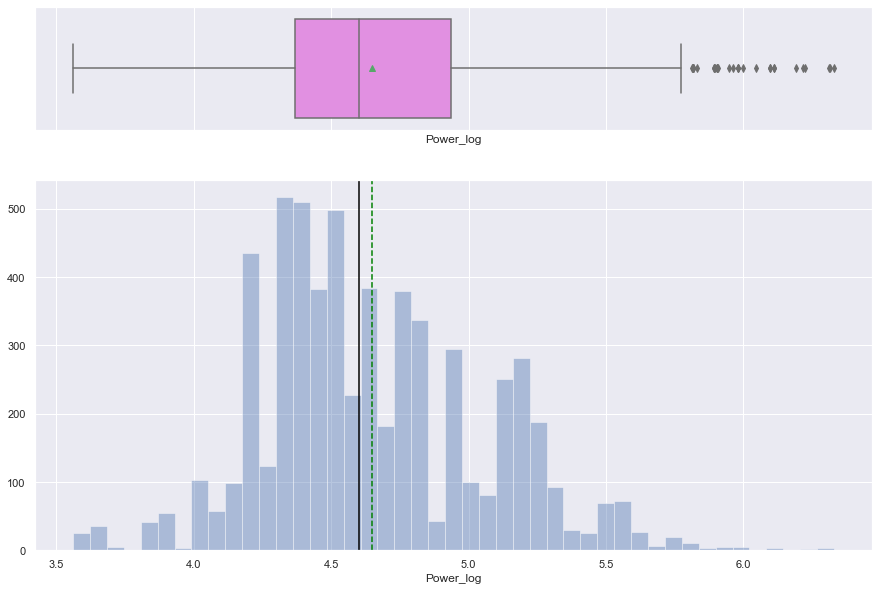

<IPython.core.display.Javascript object>

In [109]:
# histogram and boxplot for "Power_log"

histogram_boxplot(df2["Power_log"])

In [110]:
# determine outliers = 4 * iqr median of Power_log

quartiles = np.quantile(df2["Power_log"][df2["Power_log"].notnull()], [0.25, 0.75])
power_log_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_log_4iqr}")

outlier_powers = df2.loc[
    np.abs(df2["Power_log"] - df2["Power_log"].median()) > power_log_4iqr, "Power_log"
]
outlier_powers

Q1 = 4.3694478524670215, Q3 = 4.9346897371814515, 4*IQR = 2.26096753885772


Series([], Name: Power_log, dtype: float64)

<IPython.core.display.Javascript object>

 - The method of 4 * iqr found no outliers in Power_log category.

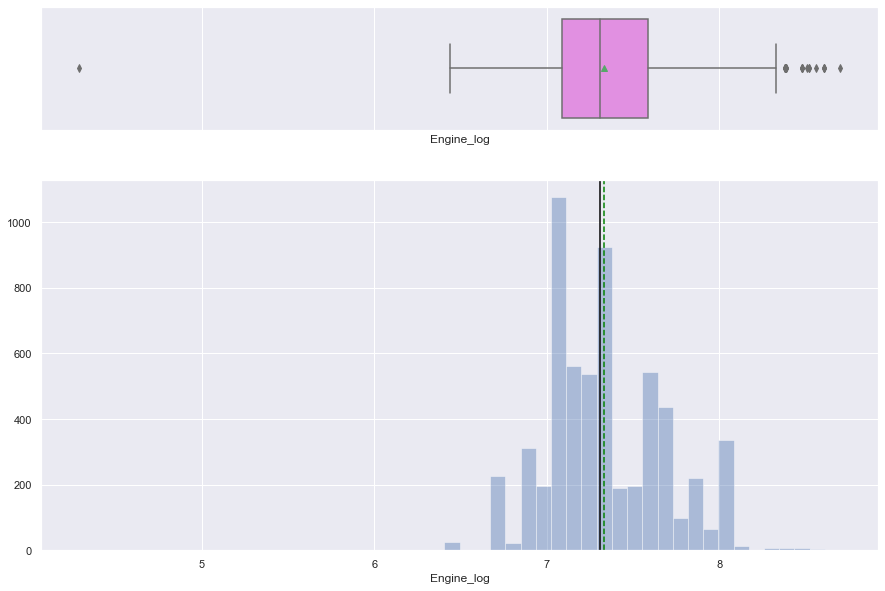

<IPython.core.display.Javascript object>

In [111]:
# histogram and boxplot for "Engine_log"

histogram_boxplot(df2["Engine_log"])

In [112]:
# determine outliers = 4 * iqr median of Engine_log

quartiles = np.quantile(df2["Engine_log"][df2["Engine_log"].notnull()], [0.25, 0.75])
Engine_log_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Engine_log_4iqr}")

outlier_engine = df2.loc[np.abs(df2['Engine_log'] - df2['Engine_log'].median()) > Engine_log_4iqr, 'Engine_log']
outlier_engine


Q1 = 7.089243155027514, Q3 = 7.585788821732034, 4*IQR = 1.986182666818081


4446    4.290459
Name: Engine_log, dtype: float64

<IPython.core.display.Javascript object>

 - Using 4 * iqr, one outlier indexed at 4446 was found in the Engine_log column.

In [113]:
# drop outliers determined in Engine_log

df2.drop(outlier_engine.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [114]:
# determine row and columns in dataframe, df2

df2.shape

(6018, 30)

<IPython.core.display.Javascript object>

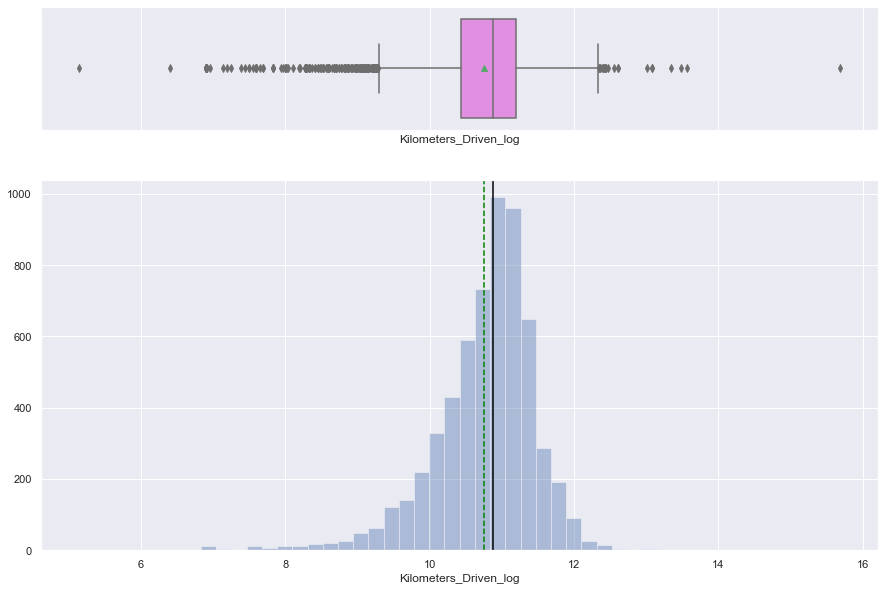

<IPython.core.display.Javascript object>

In [115]:
# histogram and boxplot for "Kilometers_Driven_log"

histogram_boxplot(df2["Kilometers_Driven_log"])

In [116]:
# determine outliers = 4 * iqr median of Kilometer_Driven_log

quartiles = np.quantile(
    df2["Kilometers_Driven_log"][df2["Kilometers_Driven_log"].notnull()], [0.25, 0.75]
)
Kilometers_Driven_log_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Kilometers_Driven_log_4iqr}")

outlier_Kilometers_Driven = df2.loc[
    np.abs(df2["Kilometers_Driven_log"] - df2["Kilometers_Driven_log"].median())
    > Kilometers_Driven_log_4iqr,
    "Kilometers_Driven_log",
]
outlier_Kilometers_Driven

Q1 = 10.434145214930487, Q3 = 11.19822841866684, 4*IQR = 3.0563328149454136


173      6.908755
601      7.194437
1001     7.550135
1161     6.908755
1175     7.496097
1198     6.908755
1242     6.908755
1361     5.147494
1362     7.650169
1598     6.908755
1704     7.438972
1726     6.909753
1844     7.601402
1856     7.496097
2000     7.696667
2054     6.908755
2073     7.601402
2119     7.140453
2123     7.601402
2328    15.687313
2646     6.908755
3769     6.919684
3910     7.601402
4300     7.599902
4346     7.601402
4492     7.694848
4968     7.601402
5249     6.909753
5339     6.908755
5516     7.244942
5606     6.398595
5829     7.388946
5941     6.908755
5966     6.955593
Name: Kilometers_Driven_log, dtype: float64

<IPython.core.display.Javascript object>

 - Using 4 * iqr method, dropping outliers that were found in the Kilometer_Driven_log column.

In [117]:
# drop outliers determined in Kilometers_Driven

df2.drop(outlier_Kilometers_Driven.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [118]:
# determine row and columns in dataframe, df2

df2.shape

(5984, 30)

<IPython.core.display.Javascript object>

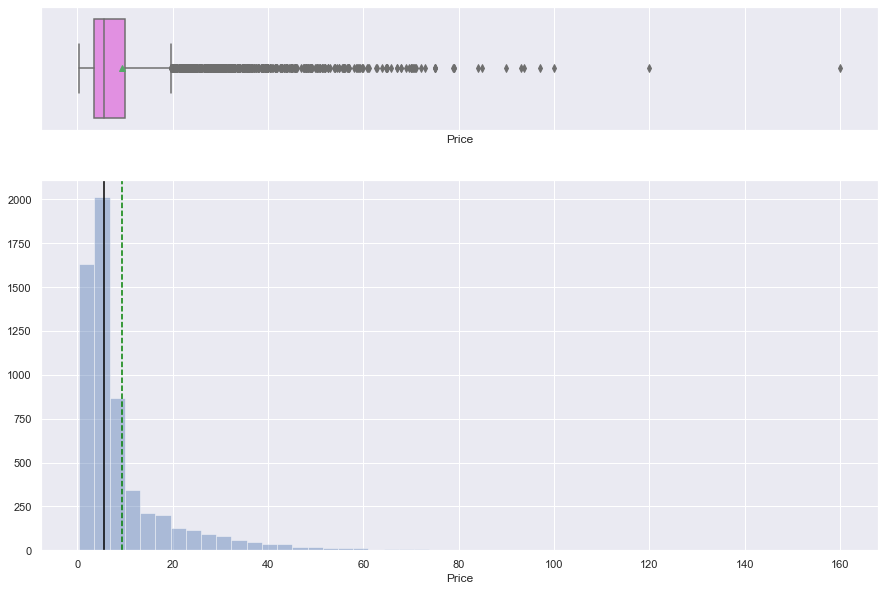

<IPython.core.display.Javascript object>

In [119]:
# histogram and boxplot for "Price"

histogram_boxplot(df2["Price"])

In [120]:
# determine outliers = 4 * iqr median of Price

quartiles = np.quantile(df2["Price"][df2["Price"].notnull()], [0.25, 0.75])
Price_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {Price_4iqr}")

outlier_price = df2.loc[
    np.abs(df2["Price"] - df2["Price"].median()) > Price_4iqr, "Price"
]
outlier_price

Q1 = 3.5, Q3 = 9.9525, 4*IQR = 25.810000000000002


67       35.67
92       39.58
134      54.00
148      37.00
168      45.00
         ...  
5919    100.00
5921     36.00
5927     45.52
5946     48.00
6008     45.00
Name: Price, Length: 320, dtype: float64

<IPython.core.display.Javascript object>

In [121]:
# drop outliers determined in Price

df2.drop(outlier_price.index, axis=0, inplace=True)

<IPython.core.display.Javascript object>

In [122]:
# determine row and columns in dataframe, df2

df2.shape

(5664, 30)

<IPython.core.display.Javascript object>

 - Dropping outliers in Price.

## <font color=green>**MODEL BUILDING - LINEAR REGRESSION**</font>

In [123]:
# drop "Price" and "Name" from ind_vars
# denote "Price" as dependant variable

ind_vars = df2.drop(["Price", "Name"], axis=1)
dep_var = df2[["Price"]]

<IPython.core.display.Javascript object>

In [124]:
# determine shape of ind_vars

ind_vars.shape

(5664, 28)

<IPython.core.display.Javascript object>

In [125]:
# encode dummy variables and set equal to ind_vars_num


def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x


ind_vars_num = encode_cat_vars(ind_vars)
ind_vars_num.head()

,Mileage,Seats,Year_log,Kilometers_Driven_log,Engine_log,Power_log,Fuel_Type_Diesel,Fuel_Type_Petrol,Fuel_Type_CNG,Fuel_Type_LPG,Fuel_Type_Electric,Transmission_Manual,Transmission_Automatic,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Owner_Type_Fourth & Above,Location_Mumbai,Location_Hyderabad,Location_Kochi,Location_Coimbatore,Location_Pune,Location_Delhi,Location_Kolkata,Location_Chennai,Location_Jaipur,Location_Bangalore,Location_Ahmedabad
0,26.60,5.0,7.606387,11.184435,6.906755,4.080246,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,19.67,5.0,7.608871,10.621352,7.367077,4.845761,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,18.20,5.0,7.606885,10.736418,7.090077,4.496471,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,20.77,7.0,7.607381,11.373675,7.130099,4.497139,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,15.20,5.0,7.607878,10.613271,7.585281,4.954418,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [126]:
# set train set to 70% of data and test set to 30 % of data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    ind_vars_num, dep_var, test_size=0.3, random_state=1
)

<IPython.core.display.Javascript object>

In [127]:
# print rows in train and test data

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 3964
Number of rows in test data = 1700


<IPython.core.display.Javascript object>

In [128]:
# prepare linear regression model

lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

### <font color=blue>**Coefficients**</font>

In [129]:
# determine coefficients of dataframe columns

coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Mileage,-0.187268
Seats,-0.203354
Year_log,1064.943949
Kilometers_Driven_log,-1.220737
Engine_log,1.253979
Power_log,6.837735
Fuel_Type_Diesel,-0.228434
Fuel_Type_Petrol,-3.217671
Fuel_Type_CNG,-0.287693
Fuel_Type_LPG,-0.775171


<IPython.core.display.Javascript object>

### <font color=Orange>**Coefficient Interpretation**</font>

- Coefficients of Year_log, Engine_log, Power_log, etc. are positive.
 - Increase in these will lead to an increase in the price of used car.

- Coefficients of Mileage, Seats, Kilometers_Driven, etc. are negative.
 - Increase in these will lead to a decrease in price of used car.

## <font color=green>**MODEL PERFORMANCE EVALUATION**</font>

In [130]:
# Adjusted R^2


def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Model performance check


def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame(
        {
            "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
            "MAE": mean_absolute_error(y_act, y_pred),
            "R^2": r2_score(y_act, y_pred),
            "Adjusted R^2": adj_r2(inp, y_act, y_pred),
        },
        index=[0],
    )

<IPython.core.display.Javascript object>

In [131]:
# Checking model performance on train set

print("Training Performance\n")
print(model_perf(lin_reg_model, x_train, y_train))


# Checking model performance on test set

print("\n\nTest Performance\n")
print(model_perf(lin_reg_model, x_test, y_test))

Training Performance

       RMSE       MAE       R^2  Adjusted R^2
0  3.289093  2.318792  0.718366      0.716362


Test Performance

       RMSE       MAE       R^2  Adjusted R^2
0  3.301527  2.357311  0.720712      0.716033


<IPython.core.display.Javascript object>

### <font color=Orange>**Observations**</font>

 - The train and test set R<sup>2</sup> are 0.7163 and 0.7160, indicating that the model explains 71.63% and 71.60% of the total variation in the train and test sets respectively.
 - Train and test scores are comparable.
 - RMSE values on the train and test sets are comparable at 3.29 and 3.30 respectively.
 - The model is not overfitting.
 - MAE indicates that our current model is able to predict price of cars within a mean error of 2.36 on the test set.
 - Overall, the performance of the model is acceptable.

## <font color=Orange>**Conclusion**</font>

 - We have been able to build a predictive model that can be used by Cars4U to predict the price of used cars with an R<sup>2</sup> of 0.72 on the training set.
 - Cars4U can use this model to predict the price of used cars within a mean error of 2.36 on the test set.
 - We found that the logarithm of the deplacement volume of engine and the logarithm of maximum power of engine are some of the factors which tend to increase the price of used cars.
 - We found that Mileage and Kilometers_Driven are two factors which tend to decrease the price of used cars.
 - We improved our linear regression model performance by applying non-linear transformations to some of the attributes.

#### <font color=Red>**Created by Stephen Catalfio**</font>